# IPL Score Prediction using Machine Learning


# Import Necessary Libraries

In [36]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats



**Load the dataset**

In [37]:
#Importing dataset
ipl_df=pd.read_csv('ipl_data.csv')
print(f"Dataset successfully Imported successfully")

Dataset successfully Imported successfully


In [38]:
ipl_df.tail()


,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
76009,617,21-05-2017,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,121,7,19.2,40,0,40,12,129
76010,617,21-05-2017,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,127,7,19.3,46,0,46,12,129
76011,617,21-05-2017,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,128,7,19.4,47,0,47,12,129
76012,617,21-05-2017,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,MG Johnson,DT Christian,129,7,19.5,48,0,47,13,129
76013,617,21-05-2017,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,129,8,19.6,47,1,47,13,129


# Exploratory Data Analysis

**Shape**

In [39]:
shape = ipl_df.shape
print("DataFrame Shape:", shape)

DataFrame Shape: (76014, 15)


Records:76014
columns:15

**Column Values**

In [40]:
# Get the names of each column
column_names = ipl_df.columns
print("Column Names:", column_names)

Column Names: Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total'],
      dtype='object')


['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker', 'non-striker', 'total']

**Types**

In [41]:
# ipl_df types of all Columns
ipl_df.dtypes

mid                 int64
date               object
venue              object
bat_team           object
bowl_team          object
batsman            object
bowler             object
runs                int64
wickets             int64
overs             float64
runs_last_5         int64
wickets_last_5      int64
striker             int64
non-striker         int64
total               int64
dtype: object

**Information about Each Column**

In [42]:
ipl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76014 entries, 0 to 76013
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mid             76014 non-null  int64  
 1   date            76014 non-null  object 
 2   venue           76014 non-null  object 
 3   bat_team        76014 non-null  object 
 4   bowl_team       76014 non-null  object 
 5   batsman         76014 non-null  object 
 6   bowler          76014 non-null  object 
 7   runs            76014 non-null  int64  
 8   wickets         76014 non-null  int64  
 9   overs           76014 non-null  float64
 10  runs_last_5     76014 non-null  int64  
 11  wickets_last_5  76014 non-null  int64  
 12  striker         76014 non-null  int64  
 13  non-striker     76014 non-null  int64  
 14  total           76014 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 8.7+ MB


**Statistical Information**

In [43]:
# Describing the ipl_dfset
ipl_df.describe()

,mid,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
count,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000
mean,308.627740,74.889349,2.415844,9.783068,33.216434,1.120307,24.962283,8.869287,160.901452
std,178.156878,48.823327,2.015207,5.772587,14.914174,1.053343,20.079752,10.795742,29.246231
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.000000
25%,154.000000,34.000000,1.000000,4.600000,24.000000,0.000000,10.000000,1.000000,142.000000
50%,308.000000,70.000000,2.000000,9.600000,34.000000,1.000000,20.000000,5.000000,162.000000
75%,463.000000,111.000000,4.000000,14.600000,43.000000,2.000000,35.000000,13.000000,181.000000
max,617.000000,263.000000,10.000000,19.600000,113.000000,7.000000,175.000000,109.000000,263.000000


**Unique Value**

In [44]:
ipl_df.nunique()

mid               617
date              442
venue              35
bat_team           14
bowl_team          14
batsman           411
bowler            329
runs              252
wickets            11
overs             140
runs_last_5       102
wickets_last_5      8
striker           155
non-striker        88
total             138
dtype: int64

**Checking for Missing Values**

In [45]:
# Check for missing values
missing_values = ipl_df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 mid               0
date              0
venue             0
bat_team          0
bowl_team         0
batsman           0
bowler            0
runs              0
wickets           0
overs             0
runs_last_5       0
wickets_last_5    0
striker           0
non-striker       0
total             0
dtype: int64


No Missing Value Found

**Unique Batting Team**

In [46]:
unique_batteams = ipl_df['bat_team'].unique()
print(unique_batteams)

['Kolkata Knight Riders' 'Chennai Super Kings' 'Rajasthan Royals'
 'Mumbai Indians' 'Deccan Chargers' 'Kings XI Punjab'
 'Royal Challengers Bangalore' 'Delhi Daredevils' 'Kochi Tuskers Kerala'
 'Pune Warriors' 'Sunrisers Hyderabad' 'Rising Pune Supergiants'
 'Gujarat Lions' 'Rising Pune Supergiant']


There are 14 Unique Batting Team

**Unique Bowling Team**

In [47]:
unique_bowlteams = ipl_df['bowl_team'].unique()
print(unique_bowlteams)

['Royal Challengers Bangalore' 'Kings XI Punjab' 'Delhi Daredevils'
 'Kolkata Knight Riders' 'Rajasthan Royals' 'Mumbai Indians'
 'Chennai Super Kings' 'Deccan Chargers' 'Pune Warriors'
 'Kochi Tuskers Kerala' 'Sunrisers Hyderabad' 'Rising Pune Supergiants'
 'Gujarat Lions' 'Rising Pune Supergiant']


There are 14 Unique  Bowling Team

**Outliers for erroneous data entry**

**Overs**

1.Unique values noted in data set

In [48]:
# Get unique values in the "overs" column
unique_overs = ipl_df['overs'].unique()

# Print the unique values
print("Unique Overs Values:", unique_overs)

Unique Overs Values: [ 0.1  0.2  0.3  0.4  0.5  0.6  1.1  1.2  1.3  1.4  1.5  1.6  2.1  2.2
  2.3  2.4  2.5  2.6  3.   3.1  3.2  3.3  3.4  3.5  3.6  4.1  4.2  4.3
  4.4  4.5  4.6  5.1  5.2  5.3  5.4  5.5  5.6  6.1  6.2  6.3  6.4  6.5
  6.6  7.1  7.2  7.3  7.4  7.5  7.6  8.1  8.2  8.3  8.4  8.5  8.6  9.1
  9.2  9.3  9.4  9.5  9.6 10.1 10.2 10.3 10.4 10.5 10.6 11.1 11.2 11.3
 11.4 11.5 11.6 12.1 12.2 12.3 12.4 12.5 12.6 13.1 13.2 13.3 13.4 13.5
 13.6 14.1 14.2 14.3 14.4 14.5 14.6 15.1 15.2 15.3 15.4 15.5 15.6 16.1
 16.2 16.3 16.4 16.5 16.6 17.1 17.2 17.3 17.4 17.5 17.6 18.1 18.2 18.3
 18.4 18.5 18.6 19.1 19.2 19.3 19.4 19.5 19.6 12.   4.   7.  19.   9.
  0.  15.   5.  16.   1.  18.   2.  11.  14.   6.  13.   8.  17.  10. ]


2.Actual Values

In [49]:
lst = []  # Initialize an empty list to store the values

for i in range(20):
    for j in range(7):  # This will iterate from 0 to 7
        lst.append(f"{i}.{j}")

# Print the resulting list

float_lst = [round(float(item), 1) for item in lst]
print(float_lst)


[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 5.0, 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 6.0, 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 7.0, 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 8.0, 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 9.0, 9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 10.0, 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 11.0, 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 12.0, 12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 13.0, 13.1, 13.2, 13.3, 13.4, 13.5, 13.6, 14.0, 14.1, 14.2, 14.3, 14.4, 14.5, 14.6, 15.0, 15.1, 15.2, 15.3, 15.4, 15.5, 15.6, 16.0, 16.1, 16.2, 16.3, 16.4, 16.5, 16.6, 17.0, 17.1, 17.2, 17.3, 17.4, 17.5, 17.6, 18.0, 18.1, 18.2, 18.3, 18.4, 18.5, 18.6, 19.0, 19.1, 19.2, 19.3, 19.4, 19.5, 19.6]


3.Comparison

In [50]:
missing_values = [x for x in unique_overs if x not in float_lst]

print(missing_values)

[]


**Wickets**

In [51]:
# Define the expected range of values for the "wickets" column (0 to 10)
expected_values = list(range(11))

# Get unique values in the "wickets" column
unique_wickets = ipl_df['wickets'].unique()

# Find missing values in the "wickets" column
missing_values = [x for x in expected_values if x not in unique_wickets]

# Print the missing values
print("Missing Wickets Values:", missing_values)

Missing Wickets Values: []


**Duplicates**

In [52]:
ipl_df.duplicated().sum()

0

### Visualisation

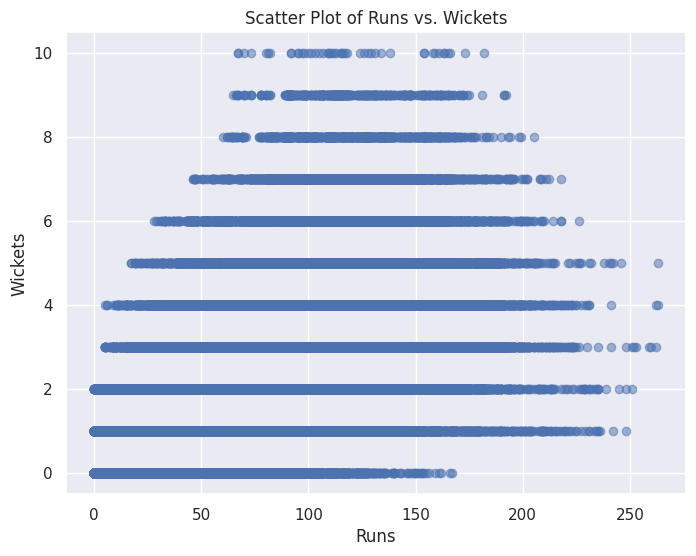

In [53]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(ipl_df['runs'], ipl_df['wickets'], marker='o', alpha=0.5)
plt.title('Scatter Plot of Runs vs. Wickets')
plt.xlabel('Runs')
plt.ylabel('Wickets')
plt.grid(True)
plt.show()

In [54]:
import pandas as pd

# Assuming you have a dataset named ipl_df

# Group by "bat_team" and "bowl_team" and calculate the sum of runs
team_runs = ipl_df.groupby(['bat_team', 'bowl_team'])['runs'].sum().reset_index()

# Rename the sum column for clarity
team_runs.rename(columns={'runs': 'Sum of runs'}, inplace=True)

# Print the result
print(team_runs)


                bat_team                    bowl_team  Sum of runs
0    Chennai Super Kings              Deccan Chargers        74452
1    Chennai Super Kings             Delhi Daredevils        99627
2    Chennai Super Kings              Kings XI Punjab        82923
3    Chennai Super Kings         Kochi Tuskers Kerala         8331
4    Chennai Super Kings        Kolkata Knight Riders        95040
..                   ...                          ...          ...
122  Sunrisers Hyderabad                Pune Warriors        13448
123  Sunrisers Hyderabad             Rajasthan Royals        57358
124  Sunrisers Hyderabad       Rising Pune Supergiant         9110
125  Sunrisers Hyderabad      Rising Pune Supergiants         7335
126  Sunrisers Hyderabad  Royal Challengers Bangalore        53367

[127 rows x 3 columns]


In [55]:
import pandas as pd
import plotly.graph_objects as go


# Group by "bat_team" and calculate the total matches and total runs scored
team_stats = ipl_df.groupby('bat_team').agg({'mid': 'nunique', 'runs': 'sum'}).reset_index()
team_stats.columns = ['Team', 'Total Matches', 'Total Runs']

# Create a table using Plotly
trace = go.Table(
    header=dict(values=["Batting Team", "Total Matches", "Total Runs"],
                fill=dict(color='#ff96ea'),
                font=dict(color=['rgb(45, 45, 45)'] * 3, size=14),
                align=['center'],
                height=55),
    cells=dict(values=[team_stats['Team'], team_stats['Total Matches'], team_stats['Total Runs']],
               fill=dict(color=['rgb(235, 193, 238)', 'rgba(228, 222, 249, 0.65)']),
               align=['center'], font_size=13, height=25))

layout = dict(
    width=750,
    height=620,
    autosize=False,
    title='Total Matches vs Total Runs per Team',
    margin=dict(t=100),
    showlegend=False,
)

fig = dict(data=[trace], layout=layout)
go.Figure(fig).show()


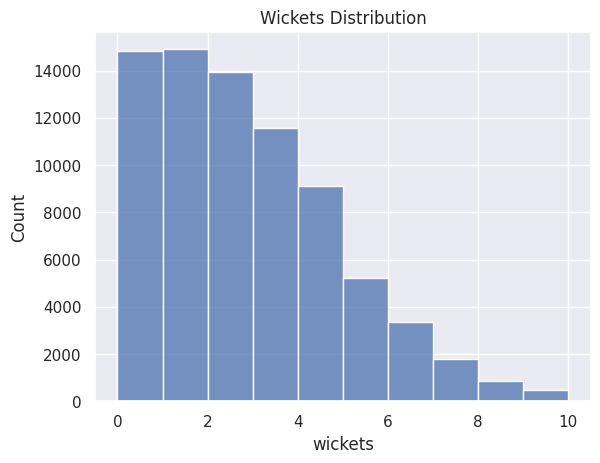

In [56]:
#Wickets Distribution
sns.histplot(ipl_df['wickets'],bins=10)
plt.title("Wickets Distribution")

plt.show()

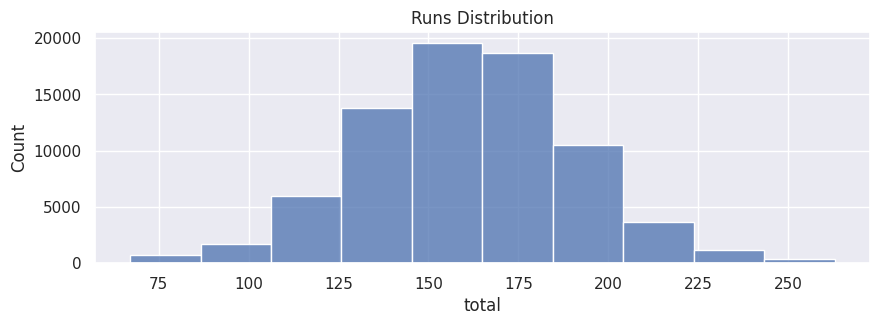

In [57]:
#Runs Distribution
plt.figure(figsize=(10,3))
sns.histplot(ipl_df['total'],kde=False,bins=10)
plt.title("Runs Distribution")

plt.show()

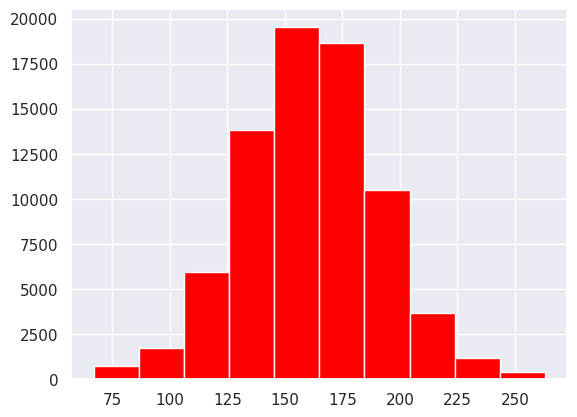

In [58]:
ipl_df['total'].hist(color="red",bins=10)
plt.show()

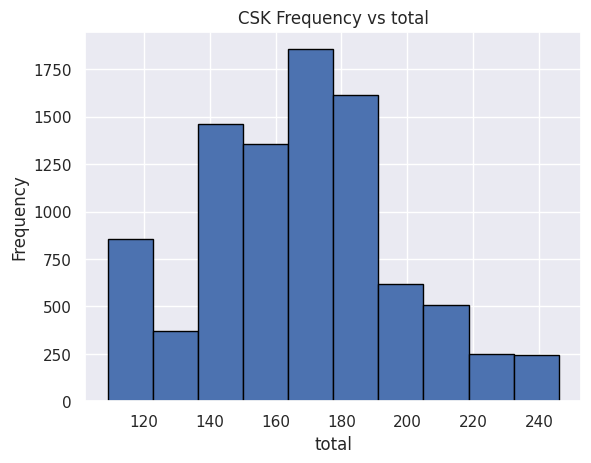

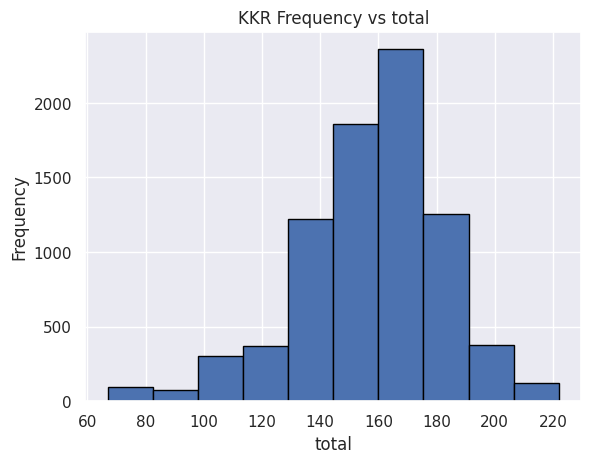

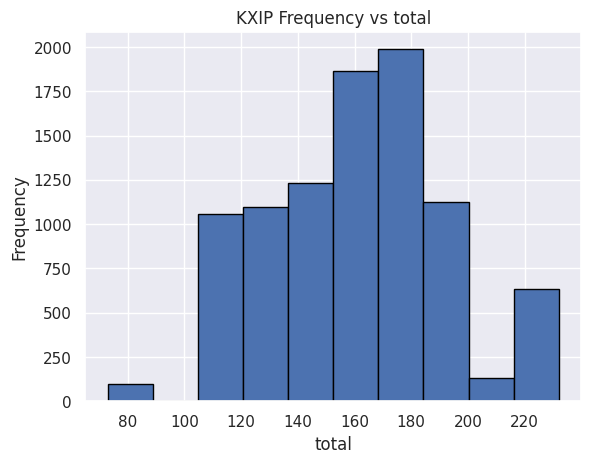

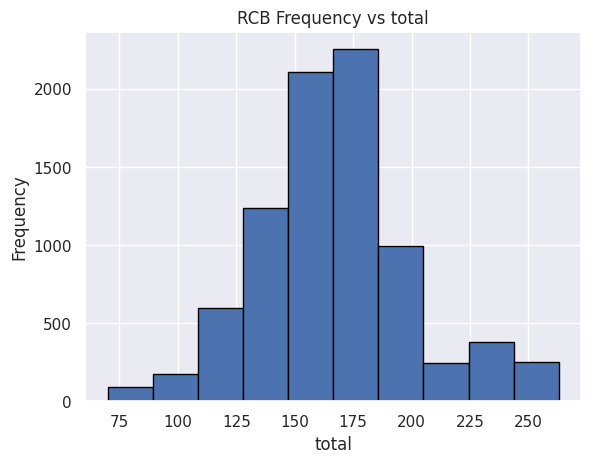

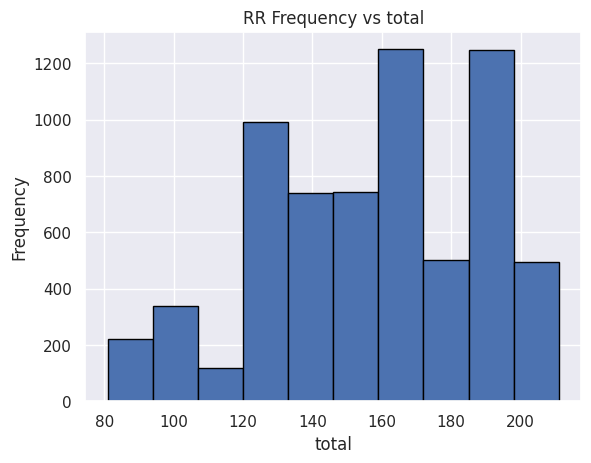

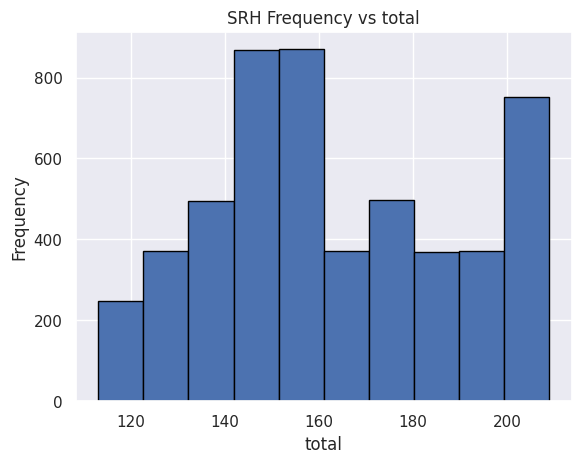

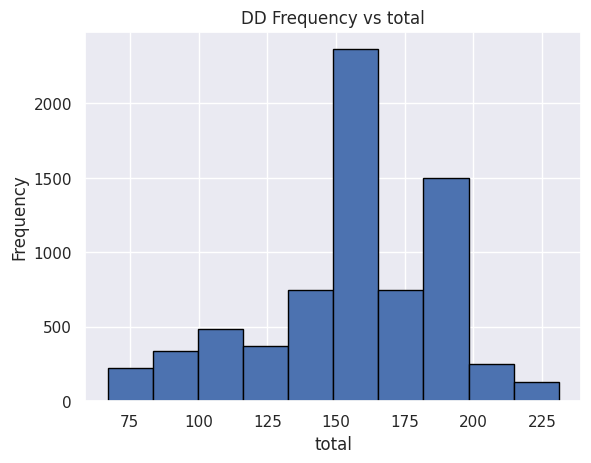

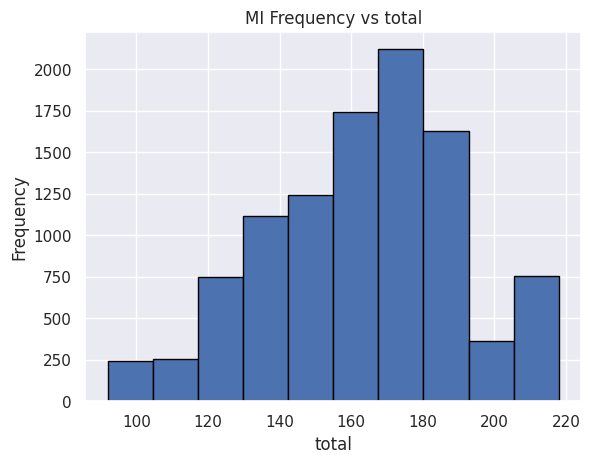

In [59]:

# Filter data for CSK
csk_data = ipl_df[ipl_df['bat_team'] == 'Chennai Super Kings']

# Create a histogram
plt.hist(csk_data['total'], bins=10, edgecolor='black')
plt.title('CSK Frequency vs total')
plt.xlabel('total')
plt.ylabel('Frequency')
plt.show()

kkr_data = ipl_df[ipl_df['bat_team'] == 'Kolkata Knight Riders']
# Create a histogram
plt.hist(kkr_data['total'], bins=10, edgecolor='black')
plt.title('KKR Frequency vs total')
plt.xlabel('total')
plt.ylabel('Frequency')
plt.show()

kp_data = ipl_df[ipl_df['bat_team'] == 'Kings XI Punjab']
# Create a histogram
plt.hist(kp_data['total'], bins=10, edgecolor='black')
plt.title('KXIP Frequency vs total')
plt.xlabel('total')
plt.ylabel('Frequency')
plt.show()

rcb_data = ipl_df[ipl_df['bat_team'] == 'Royal Challengers Bangalore']
# Create a histogram
plt.hist(rcb_data['total'], bins=10, edgecolor='black')
plt.title('RCB Frequency vs total')
plt.xlabel('total')
plt.ylabel('Frequency')
plt.show()

rr_data = ipl_df[ipl_df['bat_team'] == 'Rajasthan Royals']
# Create a histogram
plt.hist(rr_data['total'], bins=10, edgecolor='black')
plt.title('RR Frequency vs total')
plt.xlabel('total')
plt.ylabel('Frequency')
plt.show()

srh_data = ipl_df[ipl_df['bat_team'] == 'Sunrisers Hyderabad']
# Create a histogram
plt.hist(srh_data['total'], bins=10, edgecolor='black')
plt.title('SRH Frequency vs total')
plt.xlabel('total')
plt.ylabel('Frequency')
plt.show()

dd_data = ipl_df[ipl_df['bat_team'] == 'Delhi Daredevils']
# Create a histogram
plt.hist(dd_data['total'], bins=10, edgecolor='black')
plt.title('DD Frequency vs total')
plt.xlabel('total')
plt.ylabel('Frequency')
plt.show()

mi_data = ipl_df[ipl_df['bat_team'] == 'Mumbai Indians']
# Create a histogram
plt.hist(mi_data['total'], bins=10, edgecolor='black')
plt.title('MI Frequency vs total')
plt.xlabel('total')
plt.ylabel('Frequency')
plt.show()



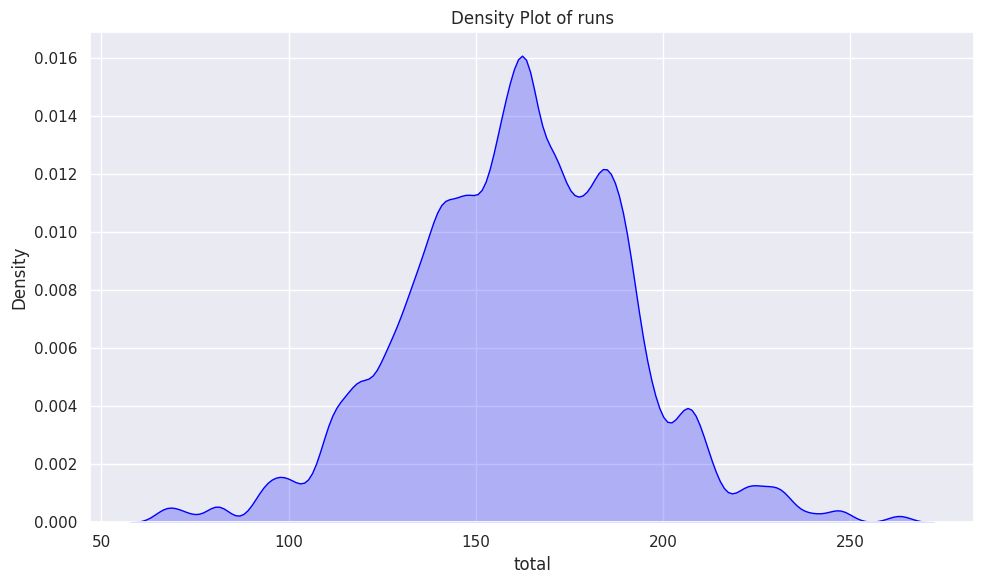

In [60]:
plt.figure(figsize=(10, 6))
sns.set_theme(style="darkgrid")
sns.kdeplot(data=ipl_df, x="total", color="blue", fill=True)
plt.xlabel('total')
plt.ylabel('Density')
plt.title('Density Plot of runs')
plt.tight_layout()
plt.show()


The density plot shows the distribution of the number of runs. The x-axis shows the number of runs, and the y-axis shows the density, which is the proportion of runs that have that number of runs.

The plot shows that most runs have between 50 and 150 runs. There are fewer runs with more than 150 runs, and even fewer runs with fewer than 50 runs. The plot also shows that the distribution is slightly skewed to the right, meaning that there are more runs with a higher number of runs than there are runs with a lower number of runs

# Data Cleaning

#### Removing Irrelevant Data colunms

In [61]:
# Names of all columns
ipl_df.columns

Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total'],
      dtype='object')

Here, we can see that columns _['mid', 'date', 'venue', 'batsman', 'bowler', 'striker', 'non-striker']_ won't provide any relevant information for our model to train

In [62]:
irrelevant = ['mid','date', 'venue','batsman', 'bowler', 'striker', 'non-striker']
print(f'Before Removing Irrelevant Columns : {ipl_df.shape}')
ipl_df = ipl_df.drop(irrelevant, axis=1) # Drop Irrelevant Columns
print(f'After Removing Irrelevant Columns : {ipl_df.shape}')

ipl_df.head()

Before Removing Irrelevant Columns : (76014, 15)
After Removing Irrelevant Columns : (76014, 8)


,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


#### Keeping only Consistent Teams


In [63]:
# Define Consistent Teams
const_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
              'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
              'Delhi Daredevils', 'Sunrisers Hyderabad']

In [64]:
print(f'Before Removing Inconsistent Teams : {ipl_df.shape}')
ipl_df = ipl_df[(ipl_df['bat_team'].isin(const_teams)) & (ipl_df['bowl_team'].isin(const_teams))]
print(f'After Removing Irrelevant Columns : {ipl_df.shape}')
print(f"Consistent Teams : \n{ipl_df['bat_team'].unique()}")
ipl_df.head()

Before Removing Inconsistent Teams : (76014, 8)
After Removing Irrelevant Columns : (53811, 8)
Consistent Teams : 
['Kolkata Knight Riders' 'Chennai Super Kings' 'Rajasthan Royals'
 'Mumbai Indians' 'Kings XI Punjab' 'Royal Challengers Bangalore'
 'Delhi Daredevils' 'Sunrisers Hyderabad']


,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


#### Remove First 5 Overs of every match

In [65]:
print(f'Before Removing Overs : {ipl_df.shape}')
ipl_df = ipl_df[ipl_df['overs'] >= 5.0]
print(f'After Removing Overs : {ipl_df.shape}')
dfg=ipl_df
ipl_df.head(76014)

Before Removing Overs : (53811, 8)
After Removing Overs : (40108, 8)


,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222
33,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222
34,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222
35,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,222
36,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,222
...,...,...,...,...,...,...,...,...
75884,Kolkata Knight Riders,Mumbai Indians,106,9,18.1,29,4,107
75885,Kolkata Knight Riders,Mumbai Indians,107,9,18.2,29,4,107
75886,Kolkata Knight Riders,Mumbai Indians,107,9,18.3,28,4,107
75887,Kolkata Knight Riders,Mumbai Indians,107,9,18.4,24,4,107


Plotting a Correlation Matrix of current data

<ipython-input-66-785d577b9e84>:5: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



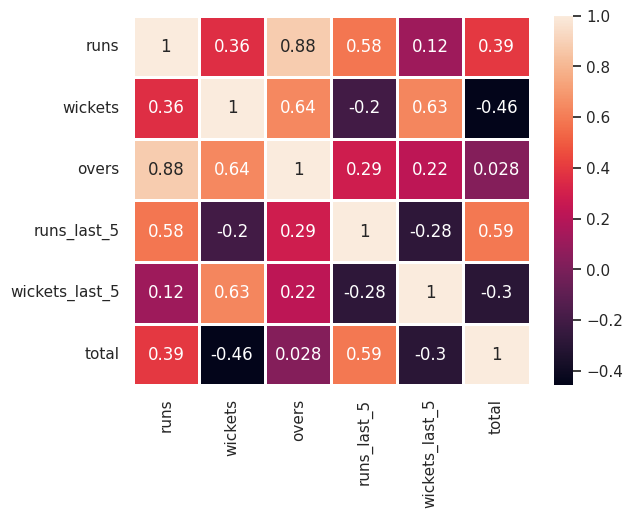

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the correlation matrix
correlation_matrix = ipl_df.corr()

# Increase the size of each cell by setting the linewidths parameter
sns.heatmap(data=correlation_matrix, annot=True, linewidths=2)

# Show the heatmap
plt.show()


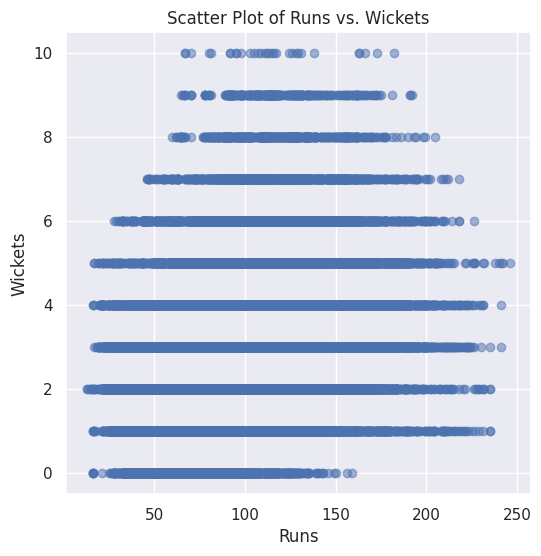

In [67]:
# Create a scatter plot
plt.figure(figsize=(6, 6))
plt.scatter(ipl_df['runs'], ipl_df['wickets'], marker='o', alpha=0.5)
plt.title('Scatter Plot of Runs vs. Wickets')
plt.xlabel('Runs')
plt.ylabel('Wickets')
plt.grid(True)
plt.show()

In [68]:
min(ipl_df['total'])

67

# Data Preprocessing and Encoding

#### Performing Label Encoding

In [69]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in ['bat_team', 'bowl_team']:
  ipl_df[col] = le.fit_transform(ipl_df[col])
ipl_df.head()

,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,3,6,61,0,5.1,59,0,222
33,3,6,61,1,5.2,59,1,222
34,3,6,61,1,5.3,59,1,222
35,3,6,61,1,5.4,59,1,222
36,3,6,61,1,5.5,58,1,222


In [85]:
# Encoded Data
df=ipl_df
ipl_df



,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,3,6,61,0,5.1,59,0,222
33,3,6,61,1,5.2,59,1,222
34,3,6,61,1,5.3,59,1,222
35,3,6,61,1,5.4,59,1,222
36,3,6,61,1,5.5,58,1,222
...,...,...,...,...,...,...,...,...
75884,3,4,106,9,18.1,29,4,107
75885,3,4,107,9,18.2,29,4,107
75886,3,4,107,9,18.3,28,4,107
75887,3,4,107,9,18.4,24,4,107


**Team:Encoded Value**

In [71]:
const_teams.sort()
n=len(const_teams)
for i in range(n):
  print(const_teams[i],":",i)

Chennai Super Kings : 0
Delhi Daredevils : 1
Kings XI Punjab : 2
Kolkata Knight Riders : 3
Mumbai Indians : 4
Rajasthan Royals : 5
Royal Challengers Bangalore : 6
Sunrisers Hyderabad : 7


**Data Splitting**

In [72]:
features = df.drop(['total'], axis=1)
labels = df['total']

feature are whatever in the dataset except Total
target is Total

In [73]:
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.20, shuffle=True)
print(f"Training Set : {train_features.shape}\nTesting Set : {test_features.shape}")

Training Set : (32086, 7)
Testing Set : (8022, 7)


Partitioning the dataset into 80:20 ratio(train:test)

**Random Forest Algorithm**

In [74]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
# Train Model
forest.fit(train_features, train_labels)

RandomForestRegressor()

In [88]:
from sklearn.metrics import r2_score

# Make predictions on the testing set
predictions = forest.predict(test_features)

# Evaluate the model
mse = mean_squared_error(test_labels, predictions)
r2 = r2_score(test_labels, predictions)


print(f'R-squared: {r2}')


R-squared: 0.9239080196834614


making an instance of RandomForestRegressor and using that instance fitted training data

In [75]:
# Evaluate Model
train_score_forest = str(forest.score(train_features, train_labels)*100)
test_score_forest = str(forest.score(test_features, test_labels)*100)
print(f'Train Score : {train_score_forest[:5]}%\nTest Score : {test_score_forest[:5]}%')


Train Score : 98.93%
Test Score : 92.39%


Models performance on training and testing set using R2 score

In [76]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Assuming 'forest' is your trained random forest regression model
# 'test_features' and 'test_labels' are your testing data

mae = mean_absolute_error(test_labels, forest.predict(test_features))
mse = mean_squared_error(test_labels, forest.predict(test_features))
rmse = np.sqrt(mean_squared_error(test_labels, forest.predict(test_features)))
print(mae)
print(mse)
print(rmse)


4.926371021357933
70.13475551554752
8.374649575686586


In [89]:
from sklearn.metrics import r2_score


# Calculate R2 score for the training set
train_r2_score = r2_score(train_labels, forest.predict(train_features))

# Calculate R2 score for the test set
test_r2_score = r2_score(test_labels, forest.predict(test_features))

# Convert the scores to strings for printing
train_r2_score_str = str(train_r2_score)
test_r2_score_str = str(test_r2_score)

print(f'Train R2 Score: {train_r2_score_str[:6]}')
print(f'Test R2 Score: {test_r2_score_str[:6]}')


Train R2 Score: 0.9893
Test R2 Score: 0.9239


In [78]:
def score_predict(batting_team, bowling_team, runs, wickets, overs, runs_last_5, wickets_last_5, model=forest):
  prediction_array = []
  # Batting Team
  if batting_team == 'Chennai Super Kings':
    prediction_array = prediction_array + [0]
  elif batting_team == 'Delhi Daredevils':
    prediction_array = prediction_array + [1]
  elif batting_team == 'Kings XI Punjab':
    prediction_array = prediction_array + [2]
  elif batting_team == 'Kolkata Knight Riders':
    prediction_array = prediction_array +[3]
  elif batting_team == 'Mumbai Indians':
    prediction_array = prediction_array + [4]
  elif batting_team == 'Rajasthan Royals':
    prediction_array = prediction_array + [5]
  elif batting_team == 'Royal Challengers Bangalore':
    prediction_array = prediction_array + [6]
  elif batting_team == 'Sunrisers Hyderabad':
    prediction_array = prediction_array + [7]
  # Bowling Team
  if bowling_team == 'Chennai Super Kings':
    prediction_array = prediction_array + [0]
  elif bowling_team == 'Delhi Daredevils':
    prediction_array = prediction_array + [1]
  elif bowling_team == 'Kings XI Punjab':
    prediction_array = prediction_array + [2]
  elif bowling_team == 'Kolkata Knight Riders':
    prediction_array = prediction_array + [3]
  elif bowling_team == 'Mumbai Indians':
    prediction_array = prediction_array + [4]
  elif bowling_team == 'Rajasthan Royals':
    prediction_array = prediction_array + [5]
  elif bowling_team == 'Royal Challengers Bangalore':
    prediction_array = prediction_array + [6]
  elif bowling_team == 'Sunrisers Hyderabad':
    prediction_array = prediction_array + [7]
  prediction_array = prediction_array + [runs, wickets, overs, runs_last_5, wickets_last_5]
  prediction_array = np.array([prediction_array])
  pred = model.predict(prediction_array)
  return int(round(pred[0]))

### Test 1
- Batting Team : **Delhi Daredevils**
- Bowling Team : **Chennai Super Kings**
- Final Score : **141**

In [79]:
batting_team='Delhi Daredevils'
bowling_team='Chennai Super Kings'
score = score_predict(batting_team, bowling_team, overs=10.2, runs=68, wickets=3, runs_last_5=29, wickets_last_5=1)
print(f'Predicted Score : {score} || Actual Score : 141')

Predicted Score : 145 || Actual Score : 141


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



### Test 2
- Batting Team : **Mumbai Indians**
- Bowling Team : **Kings XI Punjab**
- Final Score : **180**

In [80]:
batting_team='Mumbai Indians'
bowling_team='Kings XI Punjab'
score = score_predict(batting_team, bowling_team, overs=12.3, runs=113, wickets=2, runs_last_5=55, wickets_last_5=0)
print(f'Predicted Score : {score} || Actual Score : 180')

Predicted Score : 194 || Actual Score : 180


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



### Test 3
- Batting Team : **Kings XI Punjab**
- Bowling Team : **Rajasthan Royals**
- Final Score : **185/4**
<br/>
These Test Was done before the match and final score were added later.

In [81]:
batting_team="Kings XI Punjab"
bowling_team="Rajasthan Royals"
score =score_predict(batting_team, bowling_team, overs=14.0, runs=118, wickets=1, runs_last_5=45, wickets_last_5=0)
print(f'Predicted Score : {score} || Actual Score : 185')

Predicted Score : 178 || Actual Score : 185


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



### Test 4
- Batting Team : **Kolkata Knight Riders**
- Bowling Team : **Chennai Super Kings**
- Final Score : **172/5**

In [82]:
batting_team="Kolkata Knight Riders"
bowling_team="Chennai Super Kings"
score = score_predict(batting_team, bowling_team, overs=18.0, runs=150, wickets=4, runs_last_5=57, wickets_last_5=1)
print(f'Predicted Score : {score} || Actual Score : 172')

Predicted Score : 174 || Actual Score : 172


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



### Test 5
- Batting Team : **Delhi Daredevils**
- Bowling Team : **Mumbai Indians**
- Final Score : **110/7**

In [83]:
batting_team='Delhi Daredevils'
bowling_team='Mumbai Indians'
score = score_predict(batting_team, bowling_team, overs=18.0, runs=96, wickets=8, runs_last_5=18, wickets_last_5=4)
print(f'Predicted Score : {score} || Actual Score : 110')

Predicted Score : 104 || Actual Score : 110


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



# Export Model

In [84]:
import pickle
filename = "ml_model.pkl"
pickle.dump(forest, open(filename, "wb"))

Exporting a machine learning model as a pickle file is a common way to save and persist the model for future use.